# Análisis Exploratorio de Datos (EDA) - COVID-19

## Presentaodo por:
- **Edwin Silva Salas**
- **Cristian Restrepo Zapata**
- **Carlos Preciado Cárdenas**

## Fase 1: Carga y Exploración Inicial de Datos

En esta primera fase del taller, realizaremos un análisis exploratorio de datos (EDA) sobre los casos confirmados de COVID-19 a nivel global. El objetivo es familiarizarnos con la estructura de los datos y obtener insights preliminares.

### Objetivos de la Fase 1:
1. **Cargar los datos**: Importar el archivo `time_series_covid19_confirmed_global.csv` que contiene información de casos confirmados por país y fecha.
2. **Inspeccionar la estructura**: Examinar las dimensiones, tipos de datos y valores faltantes.
3. **Análisis preliminar**: Identificar países con mayor número de casos, tendencias temporales y patrones relevantes.
4. **Visualización inicial**: Crear gráficos básicos para entender la distribución y evolución de los casos.

### Descripción del Dataset:
El dataset contiene información de casos confirmados de COVID-19 reportados por la Universidad Johns Hopkins. Cada fila representa un país/región y las columnas representan fechas con el número acumulado de casos confirmados.

---

## 1. Carga de Datos

In [51]:
#Considerando que la base está en un repositorio, podemos cargarla directamente
import pandas as pd
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)  # CSV separado por comas
# Mostrar las primeras y ultimas filas
df.head(300)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


### 1.1. Dimensiones del Dataset

In [52]:
from IPython.display import display, Markdown, HTML

# Crear salida en Markdown
output_md = f"""

 **Número de filas:** {df.shape[0]}\n
 **Número de columnas:** {df.shape[1]}\n
 **Tamaño total:** {df.shape[0]} × {df.shape[1]}

"""

# Mostrar en formato Markdown
display(Markdown(output_md))



 **Número de filas:** 289

 **Número de columnas:** 1147

 **Tamaño total:** 289 × 1147



## 2. Transformación de datos (pivot)

Se evidencia que para facilitar el análisis del dataset es más conveniente transformar la estructura de los datos de formato ancho a formato largo. En el formato original, cada fecha está representada como una columna separada, lo que dificulta el análisis temporal y la visualización. Para solucionar esto, utilizamos el método **pivot** mediante la función `melt()` de pandas, que convierte las columnas de fechas en filas, creando una estructura más normalizada y manejable donde cada registro representa un país/región en una fecha específica con su respectivo número de casos confirmados.

In [53]:
from IPython.display import display, Markdown

# Identificar columnas de metadatos vs fechas
id_cols = ['Province/State', 'Country/Region', 'Lat', 'Long']
date_cols = [col for col in df.columns if col not in id_cols]

# Transformar de formato ancho a largo (MELT)
df_long = df.melt(
    id_vars=id_cols,           # Columnas que se mantienen
    value_vars=date_cols,       # Columnas que se convierten en filas
    var_name='Date',            # Nombre para la columna de fechas
    value_name='Cases'          # Nombre para la columna de valores
)

# Convertir la columna Date a tipo datetime
df_long['Date'] = pd.to_datetime(df_long['Date'], format='%m/%d/%y')

# Ordenar por país y fecha
df_long = df_long.sort_values(['Country/Region', 'Date']).reset_index(drop=True)

# Configurar pandas para mostrar más filas
pd.set_option('display.max_rows', 10)
display(df_long.head(10))

#df_long.head(330327)

,Province/State,Country/Region,Lat,Long,Date,Cases
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Afghanistan,33.93911,67.709953,2020-01-23,0
2,NaN,Afghanistan,33.93911,67.709953,2020-01-24,0
3,NaN,Afghanistan,33.93911,67.709953,2020-01-25,0
4,NaN,Afghanistan,33.93911,67.709953,2020-01-26,0
5,NaN,Afghanistan,33.93911,67.709953,2020-01-27,0
6,NaN,Afghanistan,33.93911,67.709953,2020-01-28,0
7,NaN,Afghanistan,33.93911,67.709953,2020-01-29,0
8,NaN,Afghanistan,33.93911,67.709953,2020-01-30,0
9,NaN,Afghanistan,33.93911,67.709953,2020-01-31,0


In [54]:
# Crear salida en Markdown
output_md = f"""

 **Número de filas:** {df_long.shape[0]}\n
 **Número de columnas:** {df_long.shape[1]}\n
 **Tamaño total:** {df_long.shape[0]} × {df_long.shape[1]}

"""

# Mostrar en formato Markdown
display(Markdown(output_md))



 **Número de filas:** 330327

 **Número de columnas:** 6

 **Tamaño total:** 330327 × 6



## 3. Análisis de Calidad de Datos

En esta sección realizaremos un análisis exhaustivo de la calidad de los datos para identificar:
- Datos faltantes (valores nulos o NaN)
- Valores erróneos o inconsistentes
- Valores atípicos (outliers)
- Duplicados
- Tipos de datos incorrectos

### 3.1 Datos faltantes (valores nulos o NaN)

In [55]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de datos faltantes
null_counts = df_long.isnull().sum()
null_percentage = (df_long.isnull().sum() / len(df_long)) * 100

# Crear DataFrame con resultados
missing_data = pd.DataFrame({
    'Columna': null_counts.index,
    'Valores Faltantes': null_counts.values,
    'Porcentaje (%)': null_percentage.values
})

# Mostrar resumen en Markdown
display(Markdown(f"""**Total de filas en el dataset:** {len(df_long)}"""))

# Mostrar tabla de datos faltantes
display(missing_data)


**Total de filas en el dataset:** 330327

,Columna,Valores Faltantes,Porcentaje (%)
0,Province/State,226314,68.512111
1,Country/Region,0,0.000000
2,Lat,2286,0.692042
3,Long,2286,0.692042
4,Date,0,0.000000
5,Cases,0,0.000000


### 3.1.1. Interpretación de la Tabla de Datos Faltantes

La tabla anterior muestra un análisis detallado de los valores faltantes (nulos) en el dataset transformado de COVID-19. A continuación se explican los hallazgos para cada columna:

#### **Province/State** (Provincia/Estado)
- **Valores faltantes:** 226,314
- **Porcentaje:** 68.51%
- **Interpretación:** Esta es la columna con mayor cantidad de datos faltantes. Esto es **esperado y normal**, ya que muchos países reportan datos a nivel nacional sin desglose por provincias o estados. Por ejemplo, países pequeños como Andorra o Luxemburgo no tienen subdivisiones provinciales en el reporte.

#### **Lat** (Latitud) y **Long** (Longitud)
- **Valores faltantes:** 2,286 en cada una
- **Porcentaje:** 0.69%
- **Interpretación:** Un porcentaje muy bajo de registros sin coordenadas geográficas. Estos corresponden principalmente a categorías especiales como "Repatriated Travellers" (viajeros repatriados) o "Unknown" (desconocido), que no tienen una ubicación geográfica específica.

- **Interpretación:** **Datos completos**. Todos los registros tienen el número de casos confirmados, que es la variable principal de análisis.

#### Conclusión sobre Calidad de Datos:

El dataset presenta una **excelente calidad general**:
- Las columnas críticas (País, Fecha y Casos) están 100% completas
- Los valores faltantes en Province/State son estructurales (no todos los países reportan por provincia)
- Solo 0.69% de registros carecen de coordenadas geográficas, principalmente en categorías especiales que no requieren geolocalización

**Recomendación:** No es necesario eliminar registros por datos faltantes. Los valores nulos en Province/State y coordenadas pueden manejarse según el tipo de análisis a realizar.

### 3.2 Valores erróneos o inconsistentes

A continuación se realiza la verificación de valores erroneos o incosistentes sobre la columna **Country/Region**

In [56]:
from IPython.display import display, Markdown

# 1. Análisis de la columna Country/Region
display(Markdown("""#### Análisis de Country/Region"""))

unique_countries = df_long['Country/Region'].nunique()
display(Markdown(f"Total de países/regiones únicos: {unique_countries}"))

# Verificar inconsistencias en nombres
countries_list = sorted(df_long['Country/Region'].unique())
problems_country = []
for country in countries_list:
    if country != country.strip():
        problems_country.append({'País': country, 'Problema': 'Espacios extra'})
    if any(char in country for char in ['_', '|', '@', '#']):
        problems_country.append({'País': country, 'Problema': 'Caracteres especiales'})

if len(problems_country) > 0:
    display(Markdown("Se encontraron inconsistencias:"))
    display(pd.DataFrame(problems_country))
else:
    display(Markdown("No se encontraron inconsistencias en nombres de países"))


#### Análisis de Country/Region

Total de países/regiones únicos: 201

No se encontraron inconsistencias en nombres de países

A continuación se realiza la verificación de valores erroneos o incosistentes sobre la columna **Province/State**

In [57]:
# 2. Análisis de Province/State
display(Markdown("""#### Análisis de Province/State"""))

unique_provinces = df_long['Province/State'].nunique()
display(Markdown(f"Total de provincias/estados únicos: {unique_provinces}"))


display(Markdown(f"Muestra de los Country/Region con sus provincias/estados, solo estos tienen Province/State"))
provinces_by_country = df_long.groupby('Country/Region')['Province/State'].nunique().sort_values(ascending=False)
provinces_by_country = provinces_by_country[provinces_by_country > 0]
pd.set_option('display.max_rows', 100)   
display(provinces_by_country.head(10).to_frame())


#### Análisis de Province/State

Total de provincias/estados únicos: 91

Muestra de los Country/Region con sus provincias/estados, solo estos tienen Province/State

,Province/State
Country/Region,
China,34
Canada,16
United Kingdom,14
France,11
Australia,8
Netherlands,4
New Zealand,2
Denmark,2


No existen valores incongruentes o erroneos sobre **Province/State**

A continuación se realiza la verificación de valores erroneos o incosistentes sobre las columnas **Coordenaas LAT y LONG**

In [58]:
# 3. Verificar rangos válidos de coordenadas
display(Markdown("""
---
#### Análisis de Coordenadas Geográficas
"""))

invalid_coords = df_long[
    ((df_long['Lat'].notna()) & ((df_long['Lat'] < -90) | (df_long['Lat'] > 90))) |
    ((df_long['Long'].notna()) & ((df_long['Long'] < -180) | (df_long['Long'] > 180)))
]

if len(invalid_coords) > 0:
    display(Markdown(f"**{len(invalid_coords)} registros con coordenadas fuera de rango**"))
    display(invalid_coords[['Country/Region', 'Province/State', 'Lat', 'Long']].drop_duplicates().head(10))
else:
    display(Markdown("**Todas las coordenadas están en rangos válidos (-90/90, -180/180)**"))




---
#### Análisis de Coordenadas Geográficas


**Todas las coordenadas están en rangos válidos (-90/90, -180/180)**

A continuación se realiza la verificación de valores erroneos o incosistentes sobre la columna **Cases**

In [59]:
# 4. Verificar valores negativos en Cases
display(Markdown("""
---
#### Verificación de Valores Negativos
"""))

negative_cases = df_long[df_long['Cases'] < 0]
if len(negative_cases) > 0:
    display(Markdown(f"**ALERTA: {len(negative_cases):,} registros con casos negativos**"))
    display(negative_cases[['Country/Region', 'Province/State', 'Date', 'Cases']].head(10))
else:
    display(Markdown("**No hay valores negativos en Cases**"))




---
#### Verificación de Valores Negativos


**No hay valores negativos en Cases**

### 3.3 Valores atípicos (outliers)


Antes de realizar el análisis de valores átipicos se explora el tipo de variables de cada columna del dataset:

In [60]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 1. Identificar tipos de columnas
display(Markdown("""
---
### Identificación de Tipos de Columnas
"""))

# Separar columnas por tipo
columnas_numericas = df_long.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df_long.select_dtypes(include=['object']).columns.tolist()
columnas_datetime = df_long.select_dtypes(include=['datetime64']).columns.tolist()

# Crear DataFrame resumen
tipos_columnas = pd.DataFrame({
    'Columna': df_long.columns,
    'Tipo de Dato': df_long.dtypes.astype(str),
    'Clasificación': ['Numérica' if col in columnas_numericas else 
                      'Categórica' if col in columnas_categoricas else 
                      'Fecha' for col in df_long.columns]
})

display(Markdown(f"""
**Resumen de tipos de columnas:**
- **Columnas Numéricas:** {len(columnas_numericas)} → {', '.join([f'`{col}`' for col in columnas_numericas])}
- **Columnas Categóricas:** {len(columnas_categoricas)} → {', '.join([f'`{col}`' for col in columnas_categoricas])}
- **Columnas de Fecha:** {len(columnas_datetime)} → {', '.join([f'`{col}`' for col in columnas_datetime])}
"""))

display(tipos_columnas)




---
### Identificación de Tipos de Columnas



**Resumen de tipos de columnas:**
- **Columnas Numéricas:** 3 → `Lat`, `Long`, `Cases`
- **Columnas Categóricas:** 2 → `Province/State`, `Country/Region`
- **Columnas de Fecha:** 1 → `Date`


,Columna,Tipo de Dato,Clasificación
Province/State,Province/State,object,Categórica
Country/Region,Country/Region,object,Categórica
Lat,Lat,float64,Numérica
Long,Long,float64,Numérica
Date,Date,datetime64[ns],Fecha
Cases,Cases,int64,Numérica


Antes de identificar outliers estadísticos, es fundamental comprender la naturaleza de la variable **Cases** (Casos Confirmados). 

#### Análisis de Evolución Temporal de Casos

A continuación se presenta la **evolución de los casos confirmados de COVID-19 a nivel mundial**, donde se visualiza tanto el comportamiento de los **casos acumulados** como el **crecimiento diario** de nuevos contagios. Estas gráficas permiten identificar:

- **Períodos de crecimiento exponencial** durante las primeras olas de la pandemia
- **Picos de contagio** asociados a variantes específicas
- **Tendencias de estabilización** o disminución en el ritmo de contagios
- **Impacto de medidas sanitarias** y campañas de vacunación a nivel global

El análisis temporal es fundamental para comprender la dinámica de propagación del virus y evaluar la efectividad de las respuestas de salud pública implementadas en diferentes períodos.


### Gráfica de Casos Acumulados COVID-19

Esta gráfica muestra el **total acumulado** de casos confirmados a nivel global a lo largo del tiempo.


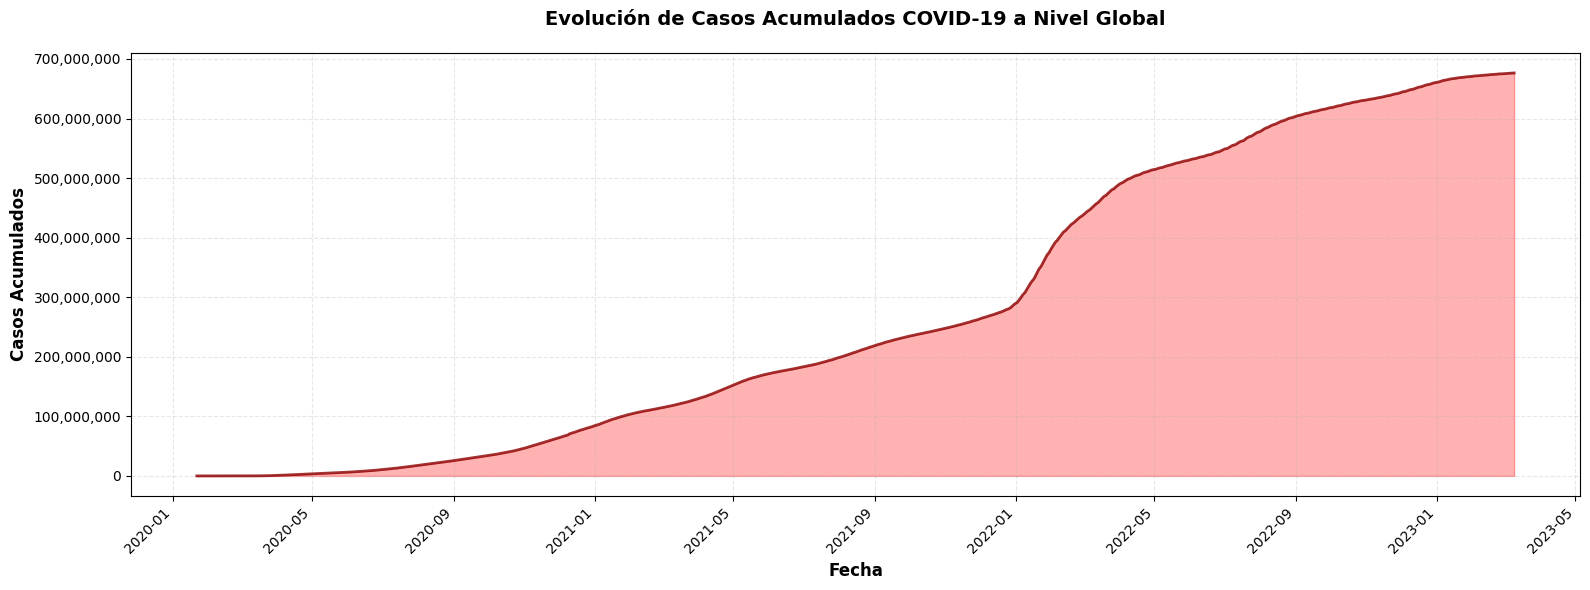

In [61]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por fecha y sumar todos los casos acumulados de todos los países/provincias
casos_acumulados_por_dia = df_long.groupby('Date')['Cases'].sum().reset_index()
casos_acumulados_por_dia.columns = ['Fecha', 'Total_Casos_Acumulados']

display(Markdown("""
### Gráfica de Casos Acumulados COVID-19

Esta gráfica muestra el **total acumulado** de casos confirmados a nivel global a lo largo del tiempo.
"""))

# Crear la gráfica
fig, ax = plt.subplots(figsize=(16, 6))

# Gráfica de línea con casos acumulados
ax.plot(casos_acumulados_por_dia['Fecha'], 
        casos_acumulados_por_dia['Total_Casos_Acumulados'], 
        linewidth=2, 
        color='darkred',
        alpha=0.8)

# Rellenar el área bajo la curva
ax.fill_between(casos_acumulados_por_dia['Fecha'], 
                casos_acumulados_por_dia['Total_Casos_Acumulados'],
                alpha=0.3,
                color='red')

# Configuración del gráfico
ax.set_xlabel('Fecha', fontsize=12, fontweight='bold')
ax.set_ylabel('Casos Acumulados', fontsize=12, fontweight='bold')
ax.set_title('Evolución de Casos Acumulados COVID-19 a Nivel Global', 
             fontsize=14, fontweight='bold', pad=20)

# Formato del eje Y con separadores de miles
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Grid para mejor lectura
ax.grid(True, alpha=0.3, linestyle='--')

# Ajustar layout
plt.tight_layout()
plt.show()




### Gráfica de Crecimiento Diario de Casos COVID-19

Esta gráfica muestra el **incremento diario** de casos confirmados a nivel global.


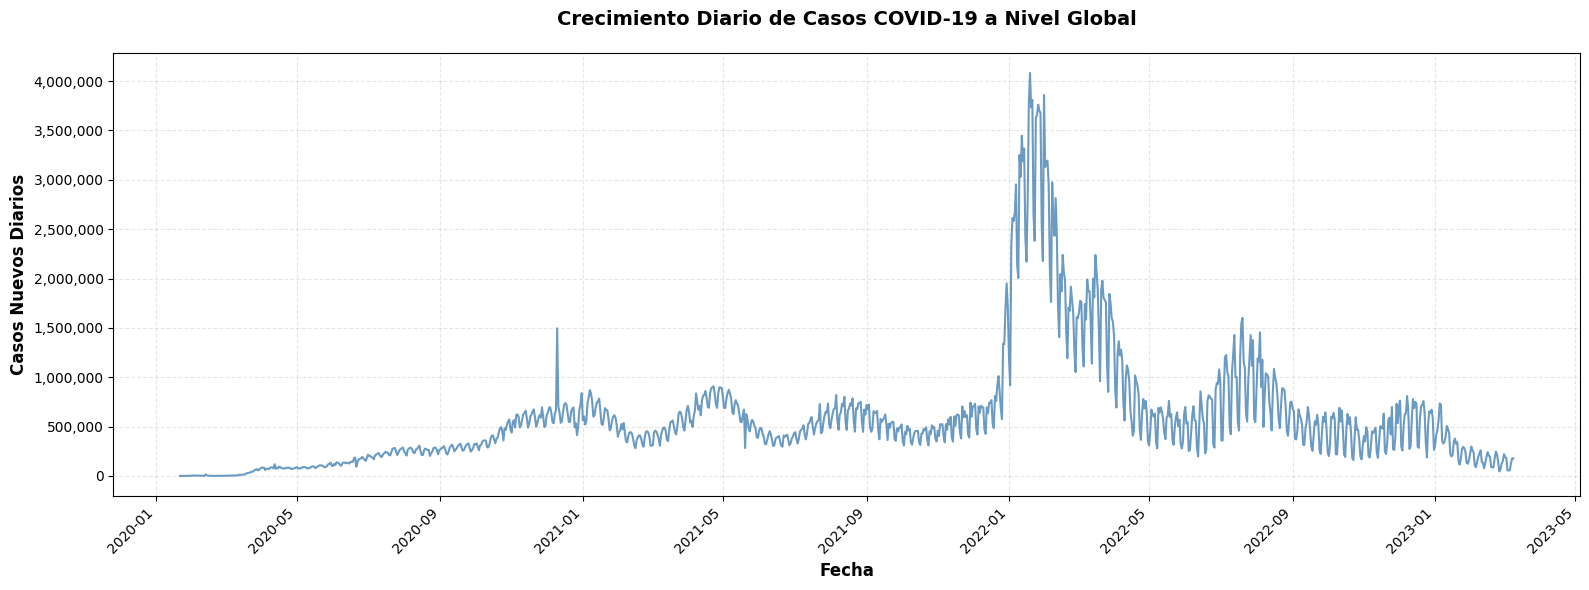

In [62]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por fecha y sumar todos los casos de todos los países/provincias
casos_por_dia = df_long.groupby('Date')['Cases'].sum().reset_index()
casos_por_dia.columns = ['Fecha', 'Total_Casos_Acumulados']

# Calcular el incremento diario (diferencia entre días consecutivos)
casos_por_dia['Casos_Nuevos_Diarios'] = casos_por_dia['Total_Casos_Acumulados'].diff()
# El primer día, todos los casos son nuevos
casos_por_dia.loc[0, 'Casos_Nuevos_Diarios'] = casos_por_dia.loc[0, 'Total_Casos_Acumulados']

display(Markdown("""
### Gráfica de Crecimiento Diario de Casos COVID-19

Esta gráfica muestra el **incremento diario** de casos confirmados a nivel global.
"""))

# Crear la gráfica
fig, ax = plt.subplots(figsize=(16, 6))

# Gráfica de línea
ax.plot(casos_por_dia['Fecha'], 
        casos_por_dia['Casos_Nuevos_Diarios'], 
        linewidth=1.5, 
        color='steelblue',
        alpha=0.8)

# Configuración del gráfico
ax.set_xlabel('Fecha', fontsize=12, fontweight='bold')
ax.set_ylabel('Casos Nuevos Diarios', fontsize=12, fontweight='bold')
ax.set_title('Crecimiento Diario de Casos COVID-19 a Nivel Global', 
             fontsize=14, fontweight='bold', pad=20)

# Formato del eje Y con separadores de miles
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Rotar etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Grid para mejor lectura
ax.grid(True, alpha=0.3, linestyle='--')

# Ajustar layout
plt.tight_layout()
plt.show()



### Observaciones de las Gráficas de Evolución Temporal:

Al analizar las gráficas anteriores de **casos acumulados** y **crecimiento diario**, se observa:

**Comportamiento Natural de la Pandemia**: Los datos muestran un crecimiento exponencial característico de una pandemia, con múltiples olas y picos de contagio.

**Variabilidad Esperada**: Las diferencias significativas entre días consecutivos reflejan:
   - Variantes más contagiosas (Delta, Omicron)
   - Cambios en políticas de testeo
   - Eventos de super-propagación
   - Diferencias en reportes (efectos de fin de semana)

**Heterogeneidad Geográfica**: Los valores extremadamente altos corresponden principalmente a:
   - Países con alta población (US, India, Brasil, China)
   - Diferencias en capacidad de testeo y sistemas de salud
   - Momentos diferentes de la pandemia en cada región

#### Interpretación Estadística:

Aunque el método IQR (Rango Intercuartílico) identifica registros como outliers estadísticos, estos **NO son errores ni datos anómalos**, sino que representan:

- **Países grandes durante picos pandémicos**: Es natural que US o India tengan millones de casos acumulados
- **Fechas específicas con brotes masivos**: Los picos de contagio son eventos reales, no errores de medición
- **Distribución altamente asimétrica**: La variable Cases tiene una distribución sesgada a la derecha, donde pocos países concentran la mayoría de casos

**Recomendación**: 
   - No eliminar outliers en Cases (son datos reales de países grandes)
   - Revisar outliers en coordenadas para verificar su validez
   - Los valores atípicos reflejan la naturaleza heterogénea de los datos (países pequeños vs grandes)

### 3.4 Duplicados


In [63]:
from IPython.display import display, Markdown
import pandas as pd

# 1. Duplicados exactos (todas las columnas)
display(Markdown("""
---
### Duplicados Exactos (Todas las Columnas)
"""))

duplicados_totales = df_long.duplicated().sum()
total_registros = len(df_long)
porcentaje_duplicados = (duplicados_totales / total_registros) * 100

display(Markdown(f"""
- **Total de registros:** {total_registros:,}
- **Registros duplicados:** {duplicados_totales:,}
- **Porcentaje:** {porcentaje_duplicados:.2f}%
"""))

if duplicados_totales > 0:
    display(Markdown("**Se encontraron registros duplicados exactos**"))
    
    # Mostrar algunos ejemplos de duplicados
    df_duplicados = df_long[df_long.duplicated(keep=False)].sort_values(['Country/Region', 'Date'])
    display(Markdown(f"\n**Muestra de registros duplicados (primeros 20):**"))
    display(df_duplicados.head(20))
else:
    display(Markdown("**No hay registros completamente duplicados**"))



---
### Duplicados Exactos (Todas las Columnas)



- **Total de registros:** 330,327
- **Registros duplicados:** 0
- **Porcentaje:** 0.00%


**No hay registros completamente duplicados**

### Conclusiones sobre Duplicados

1. **Integridad de Datos**: 
   - La clave primaria (País, Provincia, Fecha) es única - no hay duplicados problemáticos
   
2. **Estructura Esperada**:
   - Las múltiples entradas por país y fecha son normales debido a subdivisiones provinciales
   - Países como US, China, Canada, Australia reportan datos por estado/provincia
   
3. **Recomendación**:
   - **No es necesario eliminar duplicados** - la estructura de datos es correcta
   - Para análisis a nivel país, agregar los datos usando `groupby(['Country/Region', 'Date']).sum()`
   - Para análisis provincial, usar los datos tal como están

## 4. Resolución de preguntas
### 4.1. ¿En cuál mes se presentó el mayor número de contagios?

In [64]:
#¿En cuál mes se presentó el mayor número de contagios?
from IPython.display import display, Markdown

# Extraer año-mes de la columna Date
df_long['Year-Month'] = df_long['Date'].dt.to_period('M')

# Obtener el ÚLTIMO DÍA de cada mes para cada país/provincia
# Agrupar por mes y obtener la fecha máxima de ese mes
ultimo_dia_por_mes = df_long.groupby('Year-Month')['Date'].max().reset_index()
ultimo_dia_por_mes.columns = ['Año-Mes', 'Fecha_Ultimo_Dia']

# Filtrar solo los registros del último día de cada mes
df_ultimos_dias = df_long.merge(ultimo_dia_por_mes, 
                                  left_on=['Year-Month', 'Date'], 
                                  right_on=['Año-Mes', 'Fecha_Ultimo_Dia'])

# SUMAR todos los casos del último día de cada mes (todos los países y provincias)
casos_por_mes = df_ultimos_dias.groupby('Año-Mes')['Cases'].sum().reset_index()
casos_por_mes.columns = ['Año-Mes', 'Total_Casos_Acumulados']

# Calcular casos NUEVOS por mes (diferencia entre meses consecutivos)
casos_por_mes['Casos_Nuevos'] = casos_por_mes['Total_Casos_Acumulados'].diff()
# El primer mes, todos los casos son nuevos
casos_por_mes.loc[0, 'Casos_Nuevos'] = casos_por_mes.loc[0, 'Total_Casos_Acumulados']

# Encontrar el mes con más contagios nuevos
mes_max_contagios = casos_por_mes.loc[casos_por_mes['Casos_Nuevos'].idxmax()]

display(Markdown(f"""
### Mes con Mayor Número de Contagios

**Resultado:**
- **Año-Mes:** {mes_max_contagios['Año-Mes']}
- **Casos nuevos en ese mes:** {mes_max_contagios['Casos_Nuevos']:,.0f}
- **Total acumulado al final del mes:** {mes_max_contagios['Total_Casos_Acumulados']:,.0f}

*Metodología: Se toma el último día de cada mes, se suman TODOS los casos de todos los países/provincias, y se calcula la diferencia entre meses consecutivos.*
"""))

# Mostrar los 10 meses con más contagios nuevos
display(Markdown("\n### Top 10 Meses con Más Contagios Nuevos"))
display(casos_por_mes.nlargest(10, 'Casos_Nuevos'))




### Mes con Mayor Número de Contagios

**Resultado:**
- **Año-Mes:** 2022-01
- **Casos nuevos en ese mes:** 90,483,564
- **Total acumulado al final del mes:** 379,211,855

*Metodología: Se toma el último día de cada mes, se suman TODOS los casos de todos los países/provincias, y se calcula la diferencia entre meses consecutivos.*



### Top 10 Meses con Más Contagios Nuevos

,Año-Mes,Total_Casos_Acumulados,Casos_Nuevos
24,2022-01,379211855,90483564.0
25,2022-02,437463827,58251972.0
26,2022-03,488810861,51347034.0
30,2022-07,577625050,29650733.0
31,2022-08,603339040,25713990.0
23,2021-12,288728291,25614610.0
27,2022-04,514028003,25217142.0
15,2021-04,151892994,22542204.0
11,2020-12,83778622,20356383.0
19,2021-08,218284677,19894993.0


### 4.2 ¿En ese mismo mes, cuál fue el país que reportó más contagios?

In [65]:
from IPython.display import display, Markdown

# Obtener el mes con más contagios (ya calculado anteriormente)
mes_maximo = mes_max_contagios['Año-Mes']

display(Markdown(f"""
### País con Más Contagios en {mes_maximo}
"""))

# Filtrar datos del mes con más contagios
df_mes_max = df_long[df_long['Year-Month'] == mes_maximo].copy()

# Obtener el último día de ese mes
fecha_ultimo_dia = df_mes_max['Date'].max()

# Filtrar solo el último día del mes
df_ultimo_dia_mes = df_mes_max[df_mes_max['Date'] == fecha_ultimo_dia]

# Agrupar por país y sumar casos (para incluir provincias)
casos_por_pais = df_ultimo_dia_mes.groupby('Country/Region')['Cases'].sum().reset_index()
casos_por_pais.columns = ['País', 'Casos_Acumulados']

# Ordenar de mayor a menor
casos_por_pais = casos_por_pais.sort_values('Casos_Acumulados', ascending=False)

# Calcular casos nuevos del mes por país
# Obtener casos del mes anterior
periodo_anterior = mes_maximo - 1
df_mes_anterior = df_long[df_long['Year-Month'] == periodo_anterior].copy()
fecha_ultimo_dia_anterior = df_mes_anterior['Date'].max()
df_ultimo_dia_anterior = df_mes_anterior[df_mes_anterior['Date'] == fecha_ultimo_dia_anterior]

casos_mes_anterior = df_ultimo_dia_anterior.groupby('Country/Region')['Cases'].sum().reset_index()
casos_mes_anterior.columns = ['País', 'Casos_Mes_Anterior']

# Merge y calcular diferencia
casos_por_pais = casos_por_pais.merge(casos_mes_anterior, on='País', how='left')
casos_por_pais['Casos_Nuevos_Mes'] = casos_por_pais['Casos_Acumulados'] - casos_por_pais['Casos_Mes_Anterior'].fillna(0)

# Ordenar por casos nuevos
casos_por_pais = casos_por_pais.sort_values('Casos_Nuevos_Mes', ascending=False)

# País con más contagios nuevos
pais_max = casos_por_pais.iloc[0]

display(Markdown(f"""
### Resultado:

**País con más contagios nuevos en {mes_maximo}:**

- **País:** {pais_max['País']}
- **Casos nuevos en {mes_maximo}:** {pais_max['Casos_Nuevos_Mes']:,.0f}
- **Total acumulado al final del mes:** {pais_max['Casos_Acumulados']:,.0f}

---
"""))

# Mostrar Top 10 países con más contagios nuevos ese mes
display(Markdown(f"### Top 10 Países con Más Contagios Nuevos en {mes_maximo}"))
display(casos_por_pais[['País', 'Casos_Nuevos_Mes', 'Casos_Acumulados']].head(10))


### País con Más Contagios en 2022-01



### Resultado:

**País con más contagios nuevos en 2022-01:**

- **País:** US
- **Casos nuevos en 2022-01:** 20,336,435
- **Total acumulado al final del mes:** 75,244,152

---


### Top 10 Países con Más Contagios Nuevos en 2022-01

,País,Casos_Nuevos_Mes,Casos_Acumulados
0,US,20336435,75244152
3,France,9188713,19266496
1,India,6607920,41469499
7,Italy,4857433,10983116
4,United Kingdom,4420003,17430856
8,Spain,3666508,9961253
2,Brazil,3171691,25463530
10,Argentina,2724248,8378656
9,Germany,2706351,9815533
28,Australia,2154890,2580386


### 4.3 ¿Cuál  es  el  país  con  el  menor  número  de  casos  reportados  hasta  la fecha?

In [66]:
from IPython.display import display, Markdown

# Obtener la fecha más reciente en el dataset
fecha_mas_reciente = df_long['Date'].max()

display(Markdown(f"""
### País con Menor Número de Casos Reportados

**Fecha de análisis:** {fecha_mas_reciente.strftime('%d/%m/%Y')}
"""))

# Filtrar datos de la fecha más reciente
df_fecha_reciente = df_long[df_long['Date'] == fecha_mas_reciente].copy()

# Agrupar por país y sumar casos (incluye todas las provincias)
casos_por_pais_total = df_fecha_reciente.groupby('Country/Region')['Cases'].sum().reset_index()
casos_por_pais_total.columns = ['País', 'Total_Casos']

# Ordenar de menor a mayor
casos_por_pais_total = casos_por_pais_total.sort_values('Total_Casos', ascending=True)

# Filtrar países con casos mayores a 0 (para excluir países sin casos reportados)
casos_por_pais_con_casos = casos_por_pais_total[casos_por_pais_total['Total_Casos'] > 0]

# País con menos casos (excluyendo ceros)
if len(casos_por_pais_con_casos) > 0:
    pais_minimo = casos_por_pais_con_casos.iloc[0]
    
    display(Markdown(f"""
### Resultado:

**País con menor número de casos reportados (excluyendo países sin casos):**

- **País:** {pais_minimo['País']}
- **Total de casos acumulados:** {pais_minimo['Total_Casos']:,.0f}
- **Fecha:** {fecha_mas_reciente.strftime('%d/%m/%Y')}


"""))

# Mostrar países con 0 casos
paises_sin_casos = casos_por_pais_total[casos_por_pais_total['Total_Casos'] == 0]
if len(paises_sin_casos) > 0:
    display(Markdown(f"""
### Países/Regiones sin casos reportados: {len(paises_sin_casos)}
"""))
    display(paises_sin_casos)

# Mostrar los 10 países con menos casos (excluyendo ceros)
display(Markdown(f"""

### Top 10 Países con Menor Número de Casos (excluyendo ceros)
"""))
display(casos_por_pais_con_casos.head(10))


### País con Menor Número de Casos Reportados

**Fecha de análisis:** 09/03/2023



### Resultado:

**País con menor número de casos reportados (excluyendo países sin casos):**

- **País:** Korea, North
- **Total de casos acumulados:** 1
- **Fecha:** 09/03/2023






### Top 10 Países con Menor Número de Casos (excluyendo ceros)


,País,Total_Casos
93,"Korea, North",1
107,MS Zaandam,9
5,Antarctica,11
76,Holy See,29
197,Winter Olympics 2022,535
49,Diamond Princess,712
170,Summer Olympics 2020,865
185,Tuvalu,2805
92,Kiribati,5014
126,Nauru,5247
